In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
alabaster                     0.7.13
albumentations                1.2.1
altair                        4.2.2
anyio                         3.6.2
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arviz                         0.15.1
astropy                       5.2.2
astunparse                    1.6.3
attrs                         23.1.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.12.1
backcall                      0.2.0
beautifulsoup4                4.11.2
bleach                        6.0.0
blis                          0.7.9
blosc2                        2.0.0
bokeh                         2.4.3
branca                        0.6.0
CacheControl                  0.12.11
cached-property               1.5.2
cachetools                    5.3.0
cata

In [ ]:
import tensorflow as tf
import os

In [ ]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
import cv2
import imghdr


In [ ]:
data_dir = 'drive/MyDrive/data' 

In [ ]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [ ]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [ ]:
os.listdir(data_dir)

['happy', 'sad', 'cat']

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)
data

Found 1119 files belonging to 3 classes.


<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

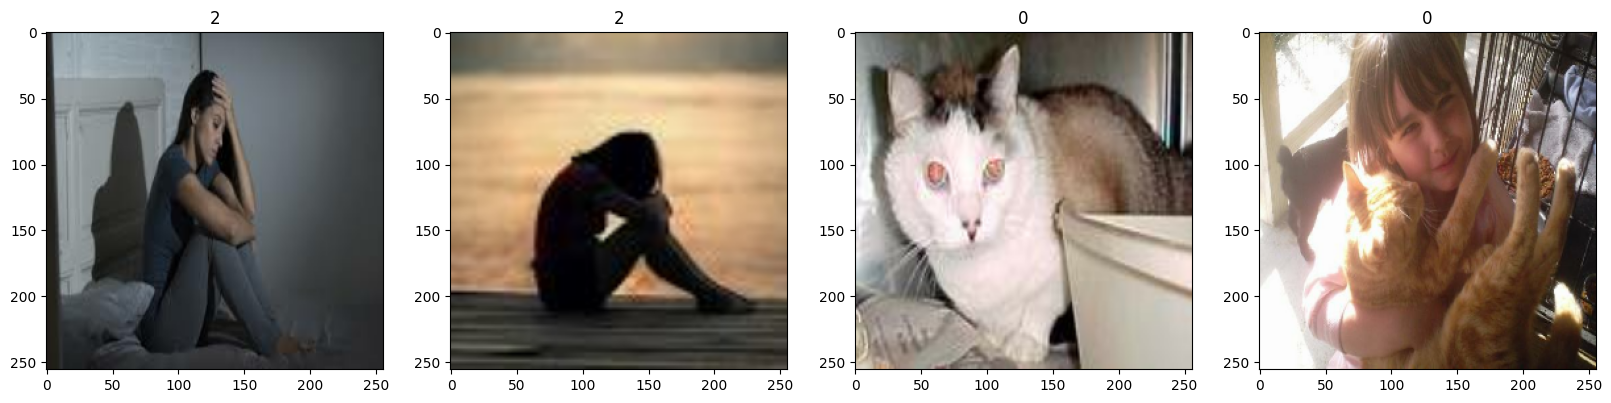

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
scaled_iterator = data.as_numpy_iterator()

In [ ]:
batch = scaled_iterator.next()

In [ ]:
batch[0].max()

1.0

Number of batches:


In [ ]:
len(data)

35

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1) +1

In [ ]:
val_size+test_size+train_size

35

take defines how much dataa we are taking in partitions
skip skips batches that are already allocated

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

Deep model


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

we have 3 convolution blocks, 1 flatten layer and 2 dense layers

In [ ]:
#we are adding layers to a model
#16 filters, filters are 3 by 3 pixels, stride by 1(moving by 1 pixel)
# relu activation converts all values below zero to zero and preserves positive values
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
#condensing the info (saving max values)
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

#30*30*16
#flattening into a single dimension
model.add(Flatten())

model.add(Dense(256, activation='relu'))
#having 1 output - zero or one, happy or sad
model.add(Dense(3, activation='softmax'))
# model.add(Conv2D(32, (3, 3),1, activation='relu', input_shape=(256, 256, 3)))
# #слой максимального объединения
# model.add(MaxPooling2D(2,2))
# model.add(Conv2D(62, (3, 3),1, activation='relu'))
# model.add(MaxPooling2D(2, 2))
# model.add(Conv2D(128, (3,3),1,  activation='relu'))
# model.add(MaxPooling2D(2, 2))
# model.add(Conv2D(128, (3,3),1,  activation='relu'))
# model.add(MaxPooling2D(2, 2))
# model.add(Flatten())
# model.add(Dense(512, activation='relu'))
# model.add(Dense(3, activation='softmax'))

adam - optimizer for keras

In [ ]:
model.compile('adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

Train

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val)


Epoch 1/20
24/24 [==============================] - 17s 593ms/step - loss: 0.9557 - accuracy: 0.6888 - val_loss: 0.7380 - val_accuracy: 0.7098
Epoch 2/20
24/24 [==============================] - 11s 443ms/step - loss: 0.6554 - accuracy: 0.7539 - val_loss: 0.6905 - val_accuracy: 0.7768
Epoch 3/20
24/24 [==============================] - 11s 414ms/step - loss: 0.5001 - accuracy: 0.8203 - val_loss: 0.4316 - val_accuracy: 0.8259
Epoch 4/20
24/24 [==============================] - 12s 484ms/step - loss: 0.4042 - accuracy: 0.8555 - val_loss: 0.4656 - val_accuracy: 0.8438
Epoch 5/20
24/24 [==============================] - 10s 390ms/step - loss: 0.3290 - accuracy: 0.8919 - val_loss: 0.4202 - val_accuracy: 0.8616
Epoch 6/20
24/24 [==============================] - 11s 430ms/step - loss: 0.2771 - accuracy: 0.9010 - val_loss: 0.2715 - val_accuracy: 0.9286
Epoch 7/20
24/24 [==============================] - 11s 435ms/step - loss: 0.1577 - accuracy: 0.9440 - val_loss: 0.2544 - val_accuracy: 0.9375

Plot performance


In [ ]:
model.save('drive/MyDrive/last_model.model')

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
# plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
# plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

Evaluate performance on testing data

In [ ]:
from tensorflow.keras import models

In [ ]:
loaded_model = models.load_model('drive/MyDrive/last_model.model')

In [ ]:
# from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [ ]:
# pre = Precision()
# re = Recall()
# acc = BinaryAccuracy()

In [ ]:
# for batch in test.as_numpy_iterator(): 
#     X, y = batch
#     yhat = model.predict(X)
#     pre.update_state(y, yhat)
#     re.update_state(y, yhat)
#     acc.update_state(y, yhat)

these values are between 0 and 1 => the model works great

In [ ]:
# print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [ ]:
#testing with outside data
# img = cv2.imread('drive/MyDrive/sadtest2.jpg')
# img = cv2.imread('drive/MyDrive/cattest1.jpg')
# img = cv2.imread('drive/MyDrive/cattest3.jpeg')
img = cv2.imread('drive/MyDrive/sadtest5.jpg')

# img = cv2.imread('drive/MyDrive/happytest1.jpg')
# img = cv2.imread('drive/MyDrive/happytest5.jpg')

img = cv2.imread('drive/MyDrive/sadtest3.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

NameError: ignored

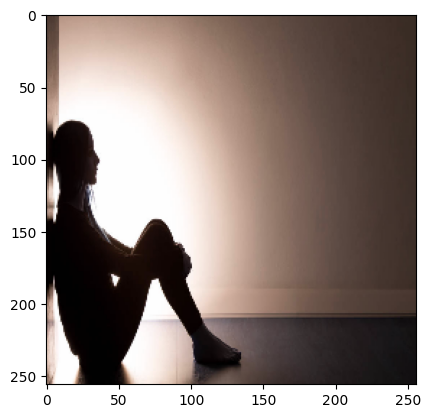

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat_loaded = loaded_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 28ms/step


In [ ]:
idex_l = np.around(yhat_loaded)
idex_l

array([[0., 1., 0.]], dtype=float32)

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 30ms/step


In [ ]:
idex = np.around(yhat)
idex

array([[0., 1., 0.]], dtype=float32)

In [ ]:
index = np.argmax(yhat)
index

2

In [ ]:
yhat

array([[0.08260585, 0.906166  , 0.01122817]], dtype=float32)

In [ ]:
if yhat_loaded[0][0] > 0.5: 
    print(f'Predicted class is Cat')

elif yhat_loaded[0][1] > 0.5:
    print(f'Predicted class is Happy')
elif yhat_loaded[0][2] > 0.5:
    print(f'Predicted class is Sad')
else:
    print('I cant decide')

Predicted class is Cat
